<a href="https://colab.research.google.com/github/JuanCappelletti/12-RNN/blob/master/Copia_de_Copia_de_TEMPERATURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Analisis micro de una muertra especifica`***

In [1]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
text='Caudal Nm3/h'
text1='Presión kg/cm2'
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [2]:
#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/TEMPERATURA/CARGA%2012%2002BIS.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=",",decimal=".")
df=pd.DataFrame(datos)
dfx=df.copy()
#dfx.Time= dfx.Date.values+' '+dfx.Time.values  

#for i in range (len(dfx['FQI151'])):
     #if (dfx['FQI151'].values[i])<=0:
         #dfx['FQI151'].values[i]=0
         #print(dfx['FQI151'].values[i])

#print(dfx.loc[dfx['FQI151']==0])
df



,TIME,BOVEDA_CAUDAL_ENT,TEMP_ENT_BOVEDA,TEMP_SAL_BOVEDA,MW_BOV_DISPTERM,SEMITINO_CAUDAL_ENT,SEMITINO_TEMP_ENT,SEMITINO_TEMP_RET,MW_SEM_DISPTERM,BOVEDIN_CAUDAL_ENT,...,TEMP_AG_CODOMOVIL,MW_CODOMOVIL_DISPTERM,CAUDAL_TRONQUETO,TEMP_AG_CASETA TRONQUETO,MW_TRONQUETO_DISPTERM,CASET_TOTAL,PROM_TEMP_PRIM,CAUDAL_IN_PRIM,MW_PRIM_DISPTERM,MW_H4
0,05:46:30,554.8,37,51,9.0,492.4,33.7,36.5,1.6,17.5,...,49,6.13,182.0,43,1.27,11.32,40.1,1737,6.3,29.0
1,05:47:00,554.2,37,52,9.7,493.1,33.3,37.0,2.1,17.4,...,50,6.71,191.4,44,1.56,12.47,40.3,1701,6.5,31.5
2,05:47:30,553.6,38,52,9.0,493.2,33.2,37.5,2.5,17.4,...,51,6.91,191.8,44,1.34,11.77,40.6,1696,5.1,29.1
3,05:48:00,554.7,37,52,9.7,491.5,33.6,36.7,1.8,17.5,...,52,7.92,193.9,44,1.58,14.03,40.8,1708,7.5,33.8
4,05:48:30,555.1,37,52,9.7,491.9,33.8,37.9,2.3,17.4,...,50,6.87,195.1,43,1.36,12.79,40.6,1701,7.1,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,11:58:00,554.4,43,59,10.3,491.9,39.3,46.1,3.9,17.4,...,53,5.35,188.5,48,1.10,10.43,46.0,1633,5.7,31.5
744,11:58:30,554.9,43,59,10.3,491.7,39.5,45.7,3.5,17.4,...,53,5.37,194.3,47,0.90,10.28,45.9,1691,5.7,31.0
745,11:59:00,556.4,43,59,10.3,493.1,39.5,46.6,4.1,17.4,...,52,4.84,191.7,47,0.89,9.63,45.8,1711,5.6,30.8
746,11:59:30,555.5,43,58,9.7,491.0,39.6,47.2,4.3,17.5,...,51,4.31,194.7,47,0.91,8.71,45.3,1656,4.4,28.3


In [3]:
#print(dfx.BOVEDA_CAUDAL_ENT.describe())
print(dfx.LANZA1_TEMP_ENT.describe(),dfx.LANZA1_TEMP_RET .describe())
#print(dfx.SEMITINO_CAUDAL_ENT.describe())_SAL_BOVEDA 
#print(dfx.BOVEDIN_CAUDAL_ENT.describe())
#print(dfx.ANILLO_SACRIF_CAUDAL_ENT.describe())
#print(dfx.LANZA1_CAUDAL_ENT .describe())


count    748.000000
mean      37.658422
std        1.636071
min       34.400000
25%       36.200000
50%       37.300000
75%       39.125000
max       41.100000
Name: LANZA1_TEMP_ENT, dtype: float64 count    748.000000
mean      38.628610
std        1.728015
min       35.300000
25%       37.100000
50%       38.200000
75%       40.300000
max       42.300000
Name: LANZA1_TEMP_RET, dtype: float64


In [4]:
dfx.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TIME                       748 non-null    object 
 1   BOVEDA_CAUDAL_ENT          748 non-null    float64
 2   TEMP_ENT_BOVEDA            748 non-null    int64  
 3   TEMP_SAL_BOVEDA            748 non-null    int64  
 4   MW_BOV_DISPTERM            748 non-null    float64
 5   SEMITINO_CAUDAL_ENT        748 non-null    float64
 6   SEMITINO_TEMP_ENT          748 non-null    float64
 7   SEMITINO_TEMP_RET          748 non-null    float64
 8   MW_SEM_DISPTERM            748 non-null    float64
 9   BOVEDIN_CAUDAL_ENT         748 non-null    float64
 10  BOVEDIN_TEMP_ENT           748 non-null    float64
 11  BOVEDIN_TEMP_RET           748 non-null    float64
 12  MW_BODIN_DISPTERM          748 non-null    float64
 13  LANZA1_CAUDAL_ENT          748 non-null    float64

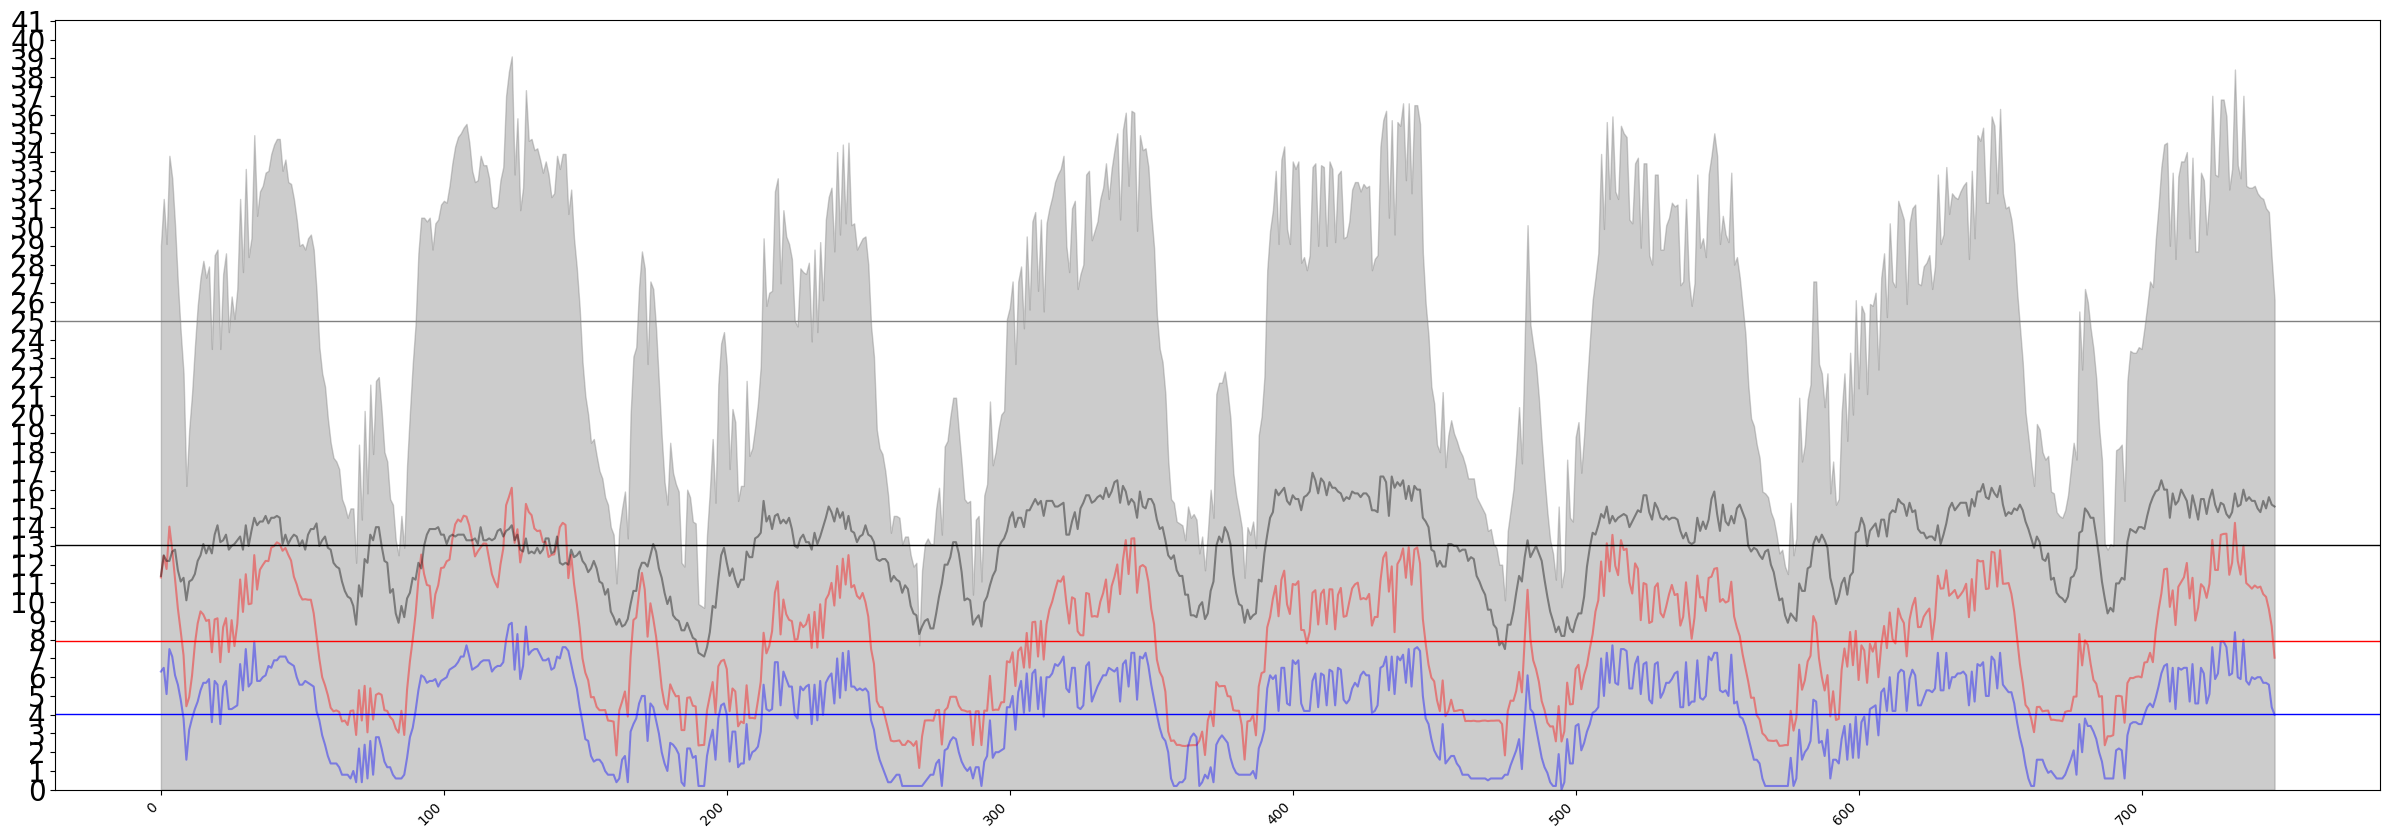

In [5]:
figW, (ax)= plt.subplots(1, figsize=(30,10))

ax.stackplot(dfx.index,dfx['MW_H4'],alpha=0.4,color='grey')
ax.plot(dfx.index,dfx['CASET_TOTAL'],alpha=0.4,color='red')
ax.plot(dfx.index,dfx['MW_PRIM_DISPTERM'],alpha=0.4,color='blue')
ax.plot(dfx.index,dfx['POTENCIATOTAL_H4'],alpha=0.4,color='black')
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')
plt.setp(labels1,fontsize=20, horizontalalignment='right')
ax.yaxis.set_major_locator(MultipleLocator(1),)
ax.yaxis.set_minor_locator(MultipleLocator(1),)
ax.axhline(y=dfx.MW_H4.mean(),linewidth=1,color='grey')
ax.axhline(y=dfx.POTENCIATOTAL_H4.mean(),linewidth=1,color='black')
ax.axhline(y=dfx.CASET_TOTAL.mean(),linewidth=1,color='red')
ax.axhline(y=dfx.MW_PRIM_DISPTERM.mean(),linewidth=1,color='blue')
ax.autoscale_view()

figW.show()


In [10]:
s=dfx.POTENCIATOTAL_H4.mean()
r=dfx.CASET_TOTAL.mean()+dfx.MW_PRIM_DISPTERM.mean()
u=dfx.MW_H4.mean()
print(s)
print(r)
print(u)

13.03114973262032
11.94885026737968
24.975401069518714


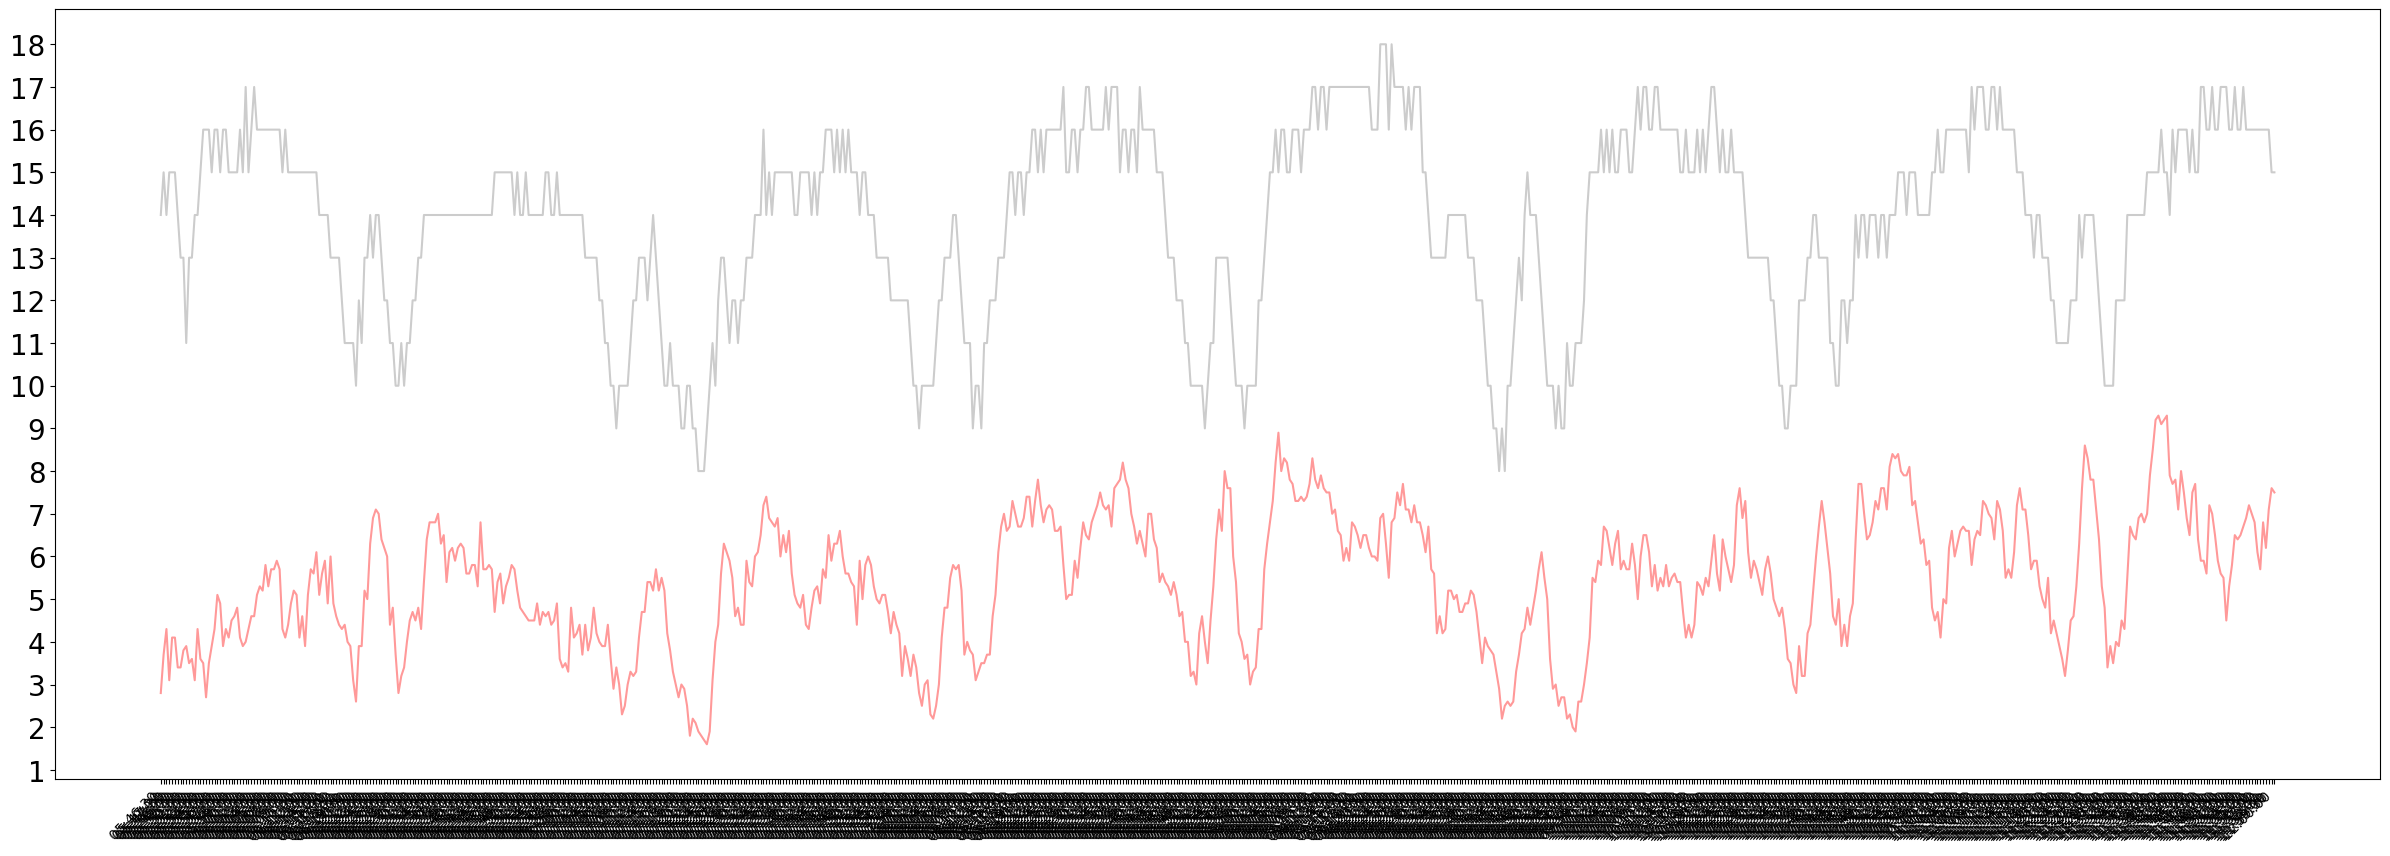

In [6]:
figq, (ax)= plt.subplots(1, figsize=(30,10))

ax.plot(dfx['TIME'],(dfx['TEMP_SAL_BOVEDA']-dfx['TEMP_ENT_BOVEDA']),alpha=0.4,color='grey')
ax.plot(dfx['TIME'],dfx['SEMITINO_TEMP_RET']-dfx['SEMITINO_TEMP_ENT'],alpha=0.4,color='red')
#ax.plot(dfx['TIME'],dfx['MW_SEM_DISPTERM']-dfx[''],alpha=0.4,color='blue')
#ax.plot(dfx['TIME'],dfx['MW_BODIN_DISPTERM'],alpha=0.4,color='black')
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')
plt.setp(labels1,fontsize=20, horizontalalignment='right')
ax.yaxis.set_major_locator(MultipleLocator(1),)
ax.yaxis.set_minor_locator(MultipleLocator(1),)
#ax.axhline(y=dfx.POTENCIATOTAL.mean(),linewidth=1,color='black')
ax.autoscale_view()

figq.show()
